In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

## EDA Part 1: Data Summarization & Visualization 

In [18]:
df = pd.read_csv("cleaned_df.csv")

df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11605 entries, 0 to 11604
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         11605 non-null  int64  
 1   Brand                        11605 non-null  object 
 2   Model                        11605 non-null  object 
 3   Body Type                    11605 non-null  object 
 4   Drivetrain                   11605 non-null  object 
 5   Interior Colour              11605 non-null  object 
 6   Exterior Colour              11605 non-null  object 
 7   Fuel Type                    11605 non-null  object 
 8   Transmission Type            11605 non-null  object 
 9   Doors                        11605 non-null  int64  
 10  Cylinder Count               7893 non-null   float64
 11  Fuel Efficiency (Lt/100kms)  11605 non-null  float64
 12  Distance (km)                11605 non-null  int64  
 13  Mileage (kms/Lt)

(   Year  Brand             Model Body Type Drivetrain Interior Colour  \
 0  2019  Acura  Other Model Type       SUV        AWD           Black   
 1  2022  Acura  Other Model Type       SUV        AWD             Red   
 2  2020  Acura  Other Model Type       SUV        AWD           Black   
 3  2019  Acura  Other Model Type     Sedan        AWD             Tan   
 4  2020  Acura  Other Model Type       SUV        AWD           Black   
 
   Exterior Colour         Fuel Type Transmission Type  Doors  Cylinder Count  \
 0           White  Premium Unleaded         Automatic      4             4.0   
 1           Black               Gas         Automatic      4             NaN   
 2           Black  Premium Unleaded         Automatic      4             4.0   
 3           Black  Premium Unleaded         Automatic      4             6.0   
 4           Black               Gas         Automatic      4             NaN   
 
    Fuel Efficiency (Lt/100kms)  Distance (km)  Mileage (kms/Lt)  

In [19]:
columns = df.columns.values
print(columns)

['Year' 'Brand' 'Model' 'Body Type' 'Drivetrain' 'Interior Colour'
 'Exterior Colour' 'Fuel Type' 'Transmission Type' 'Doors'
 'Cylinder Count' 'Fuel Efficiency (Lt/100kms)' 'Distance (km)'
 'Mileage (kms/Lt)' 'Years Used' 'Purchase Price' 'Current Market Price']


In [20]:
categorical_columns = df.select_dtypes(exclude=['number']).columns
print(len(categorical_columns), categorical_columns.values)
numeric_columns = df.select_dtypes(include=['number']).columns
print(len(numeric_columns), numeric_columns.values)

8 ['Brand' 'Model' 'Body Type' 'Drivetrain' 'Interior Colour'
 'Exterior Colour' 'Fuel Type' 'Transmission Type']
9 ['Year' 'Doors' 'Cylinder Count' 'Fuel Efficiency (Lt/100kms)'
 'Distance (km)' 'Mileage (kms/Lt)' 'Years Used' 'Purchase Price'
 'Current Market Price']


## 1. Box Plot for Outlier Detection:

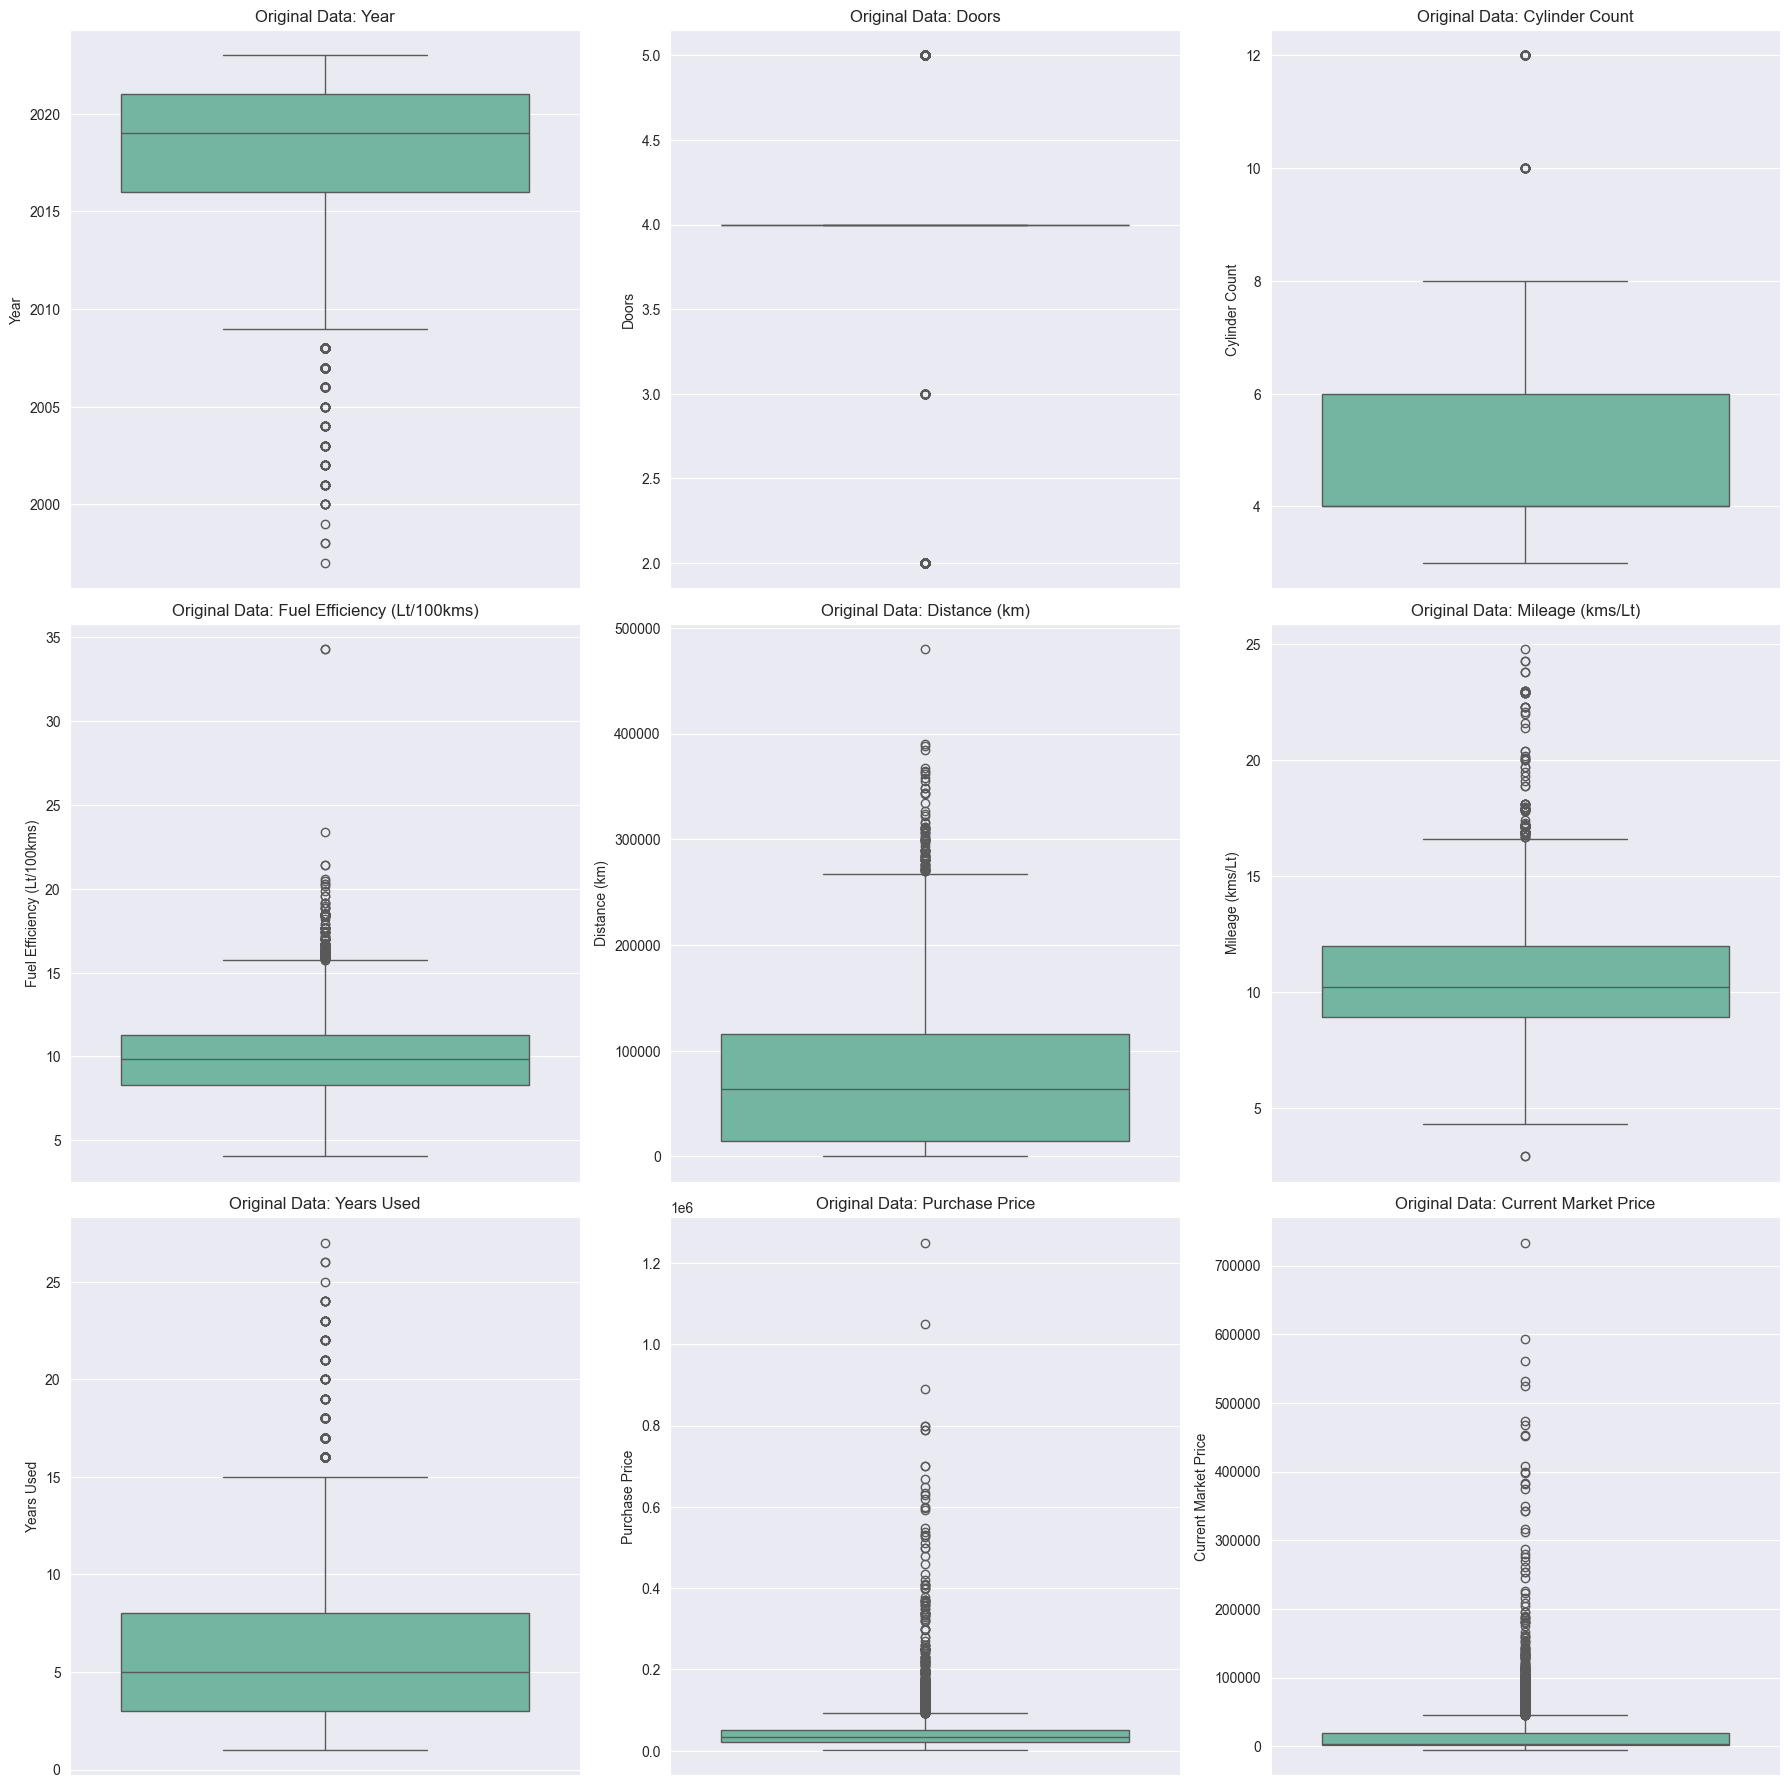

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting boxplots for the numeric columns in the original data
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Original Data: {col}')

# Hide the last empty subplot if any
if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

### Removing Outliers:

In [22]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter for non-outliers
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_clean = remove_outliers_iqr(df, numeric_columns)

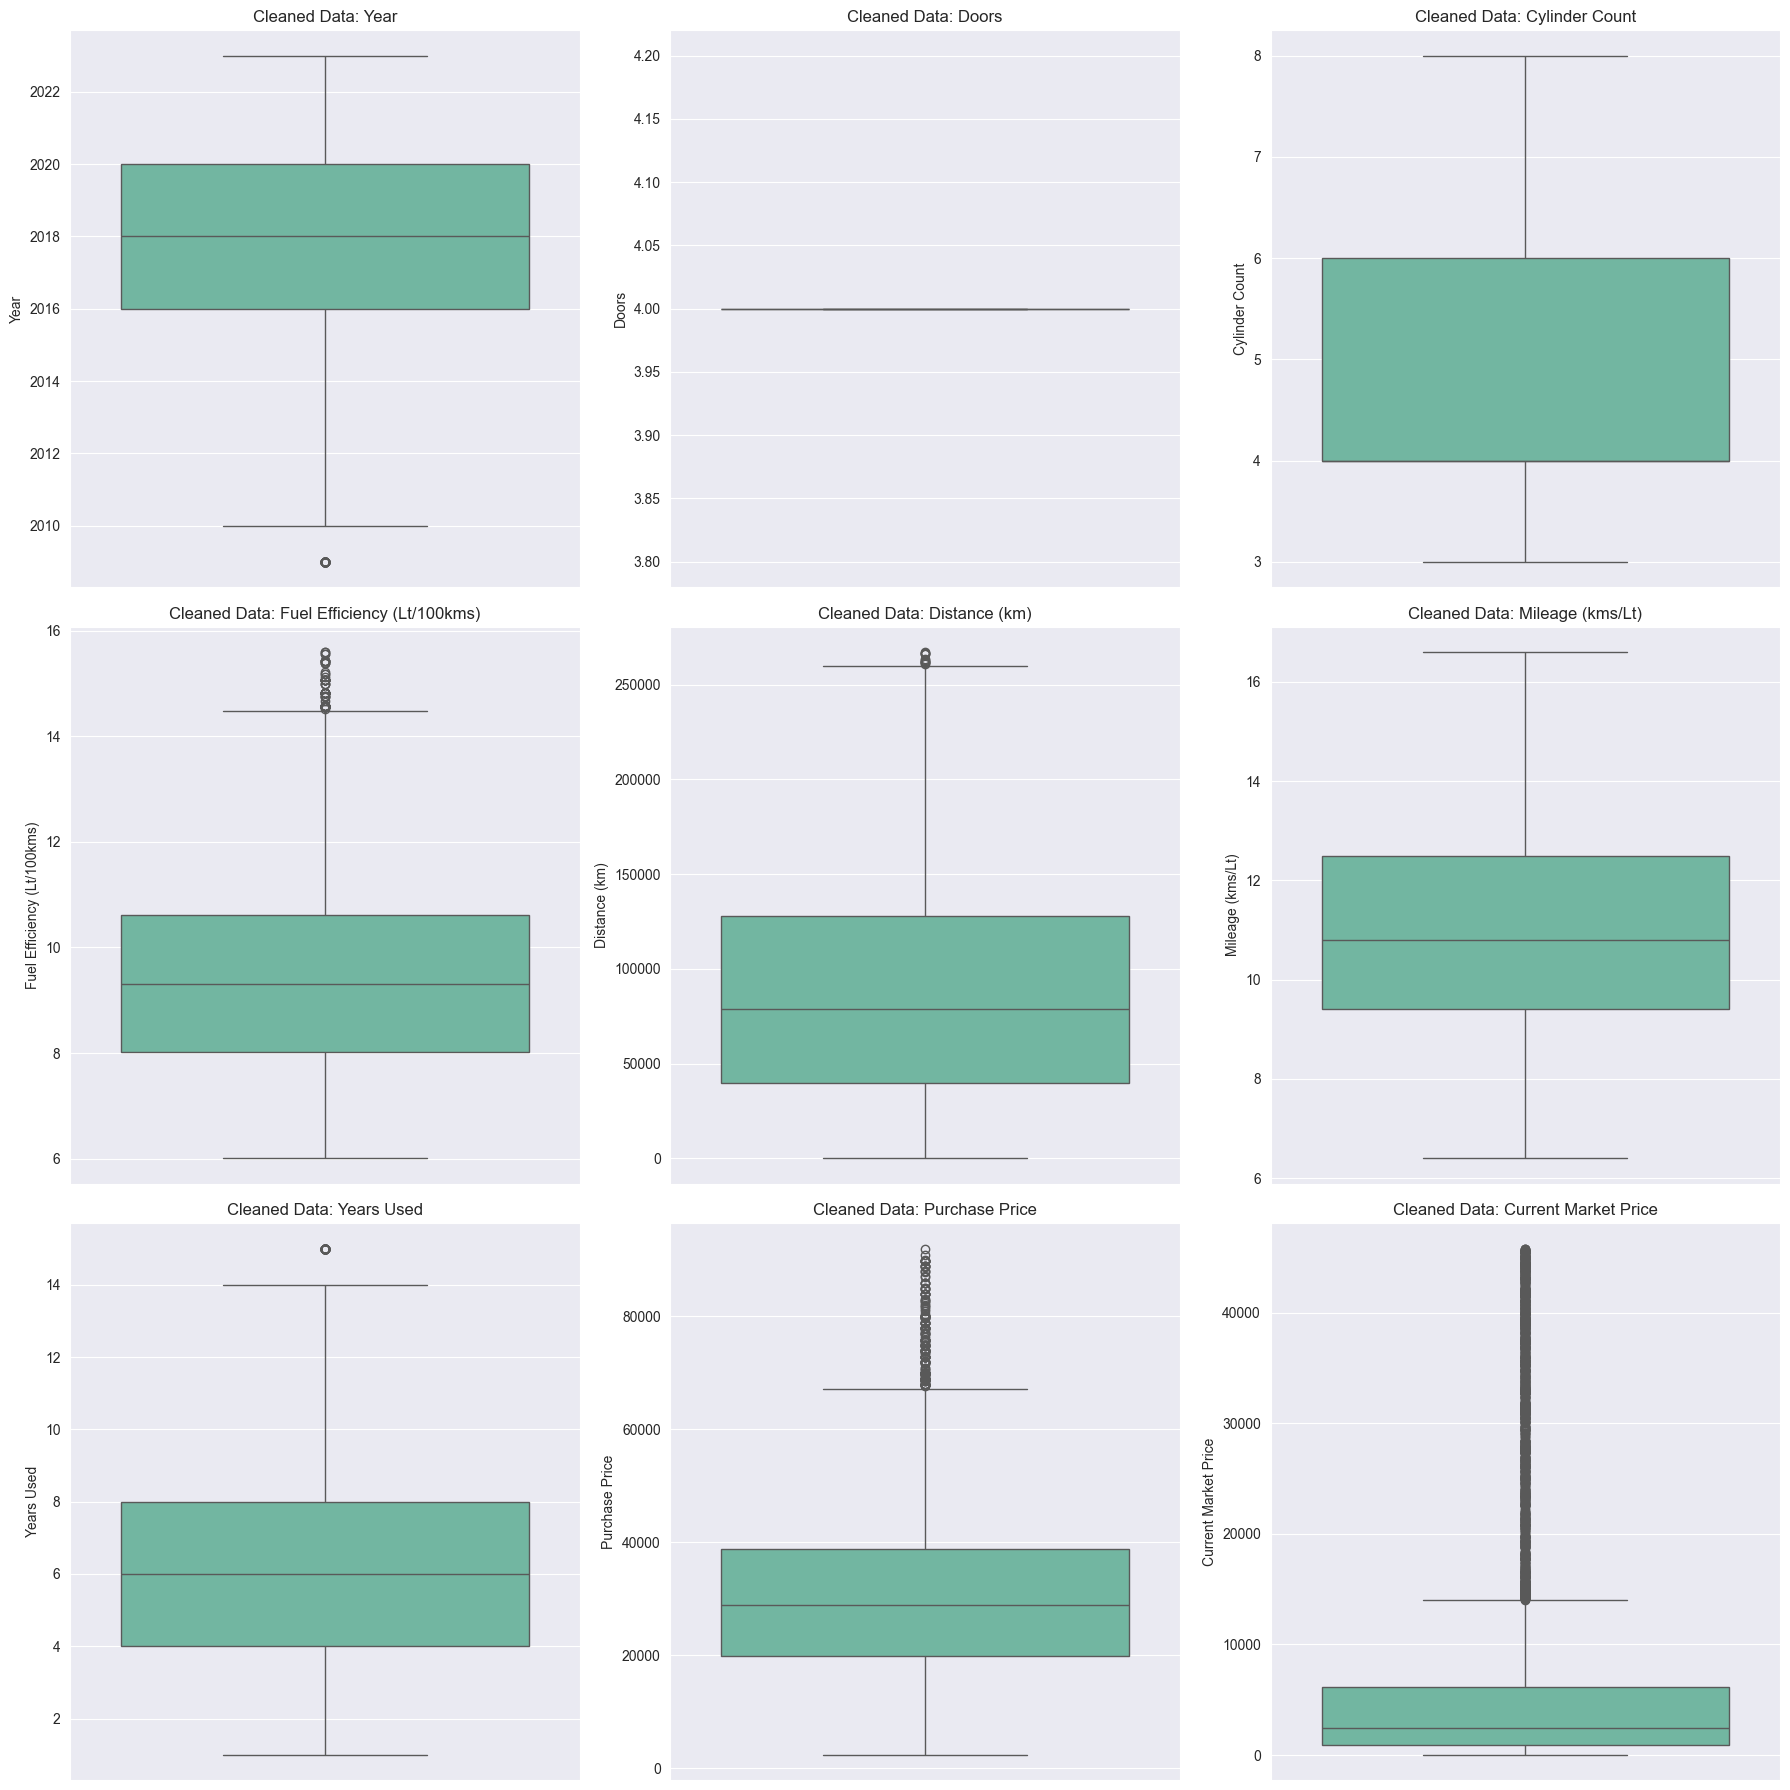

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting boxplots for cleaned data
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Cleaned Data: {col}')

plt.tight_layout()
plt.show()

## 2. Bar Plot:

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2880587932.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2880587932.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2880587932.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2880587932.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2880587932.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp

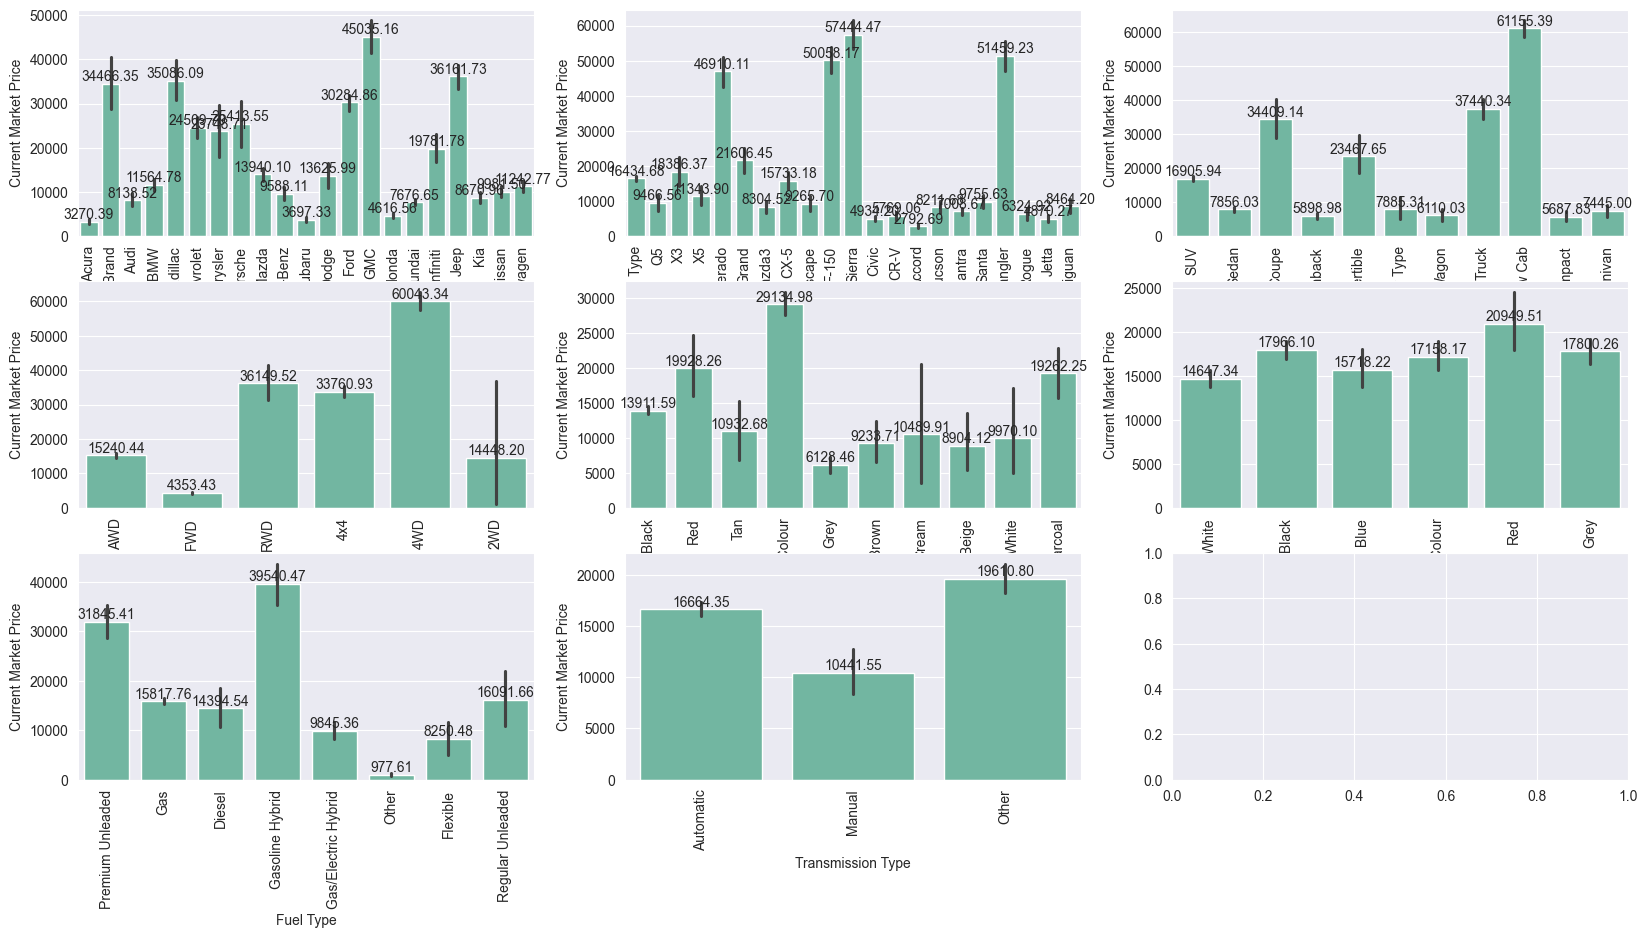

In [38]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs = axs.ravel()

# Create barplot for each categorical variable
for i, var in enumerate(categorical_columns):
    ax = sns.barplot(x=var, y='Current Market Price', data=df, ax=axs[i], estimator=np.mean)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Add numbers on top of the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')

# adjust spacing between subplots
# fig.tight_layout()

# Show plot
plt.show()

## 3. Line Plot:

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2397844729.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2397844729.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2397844729.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2397844729.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19332\2397844729.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp

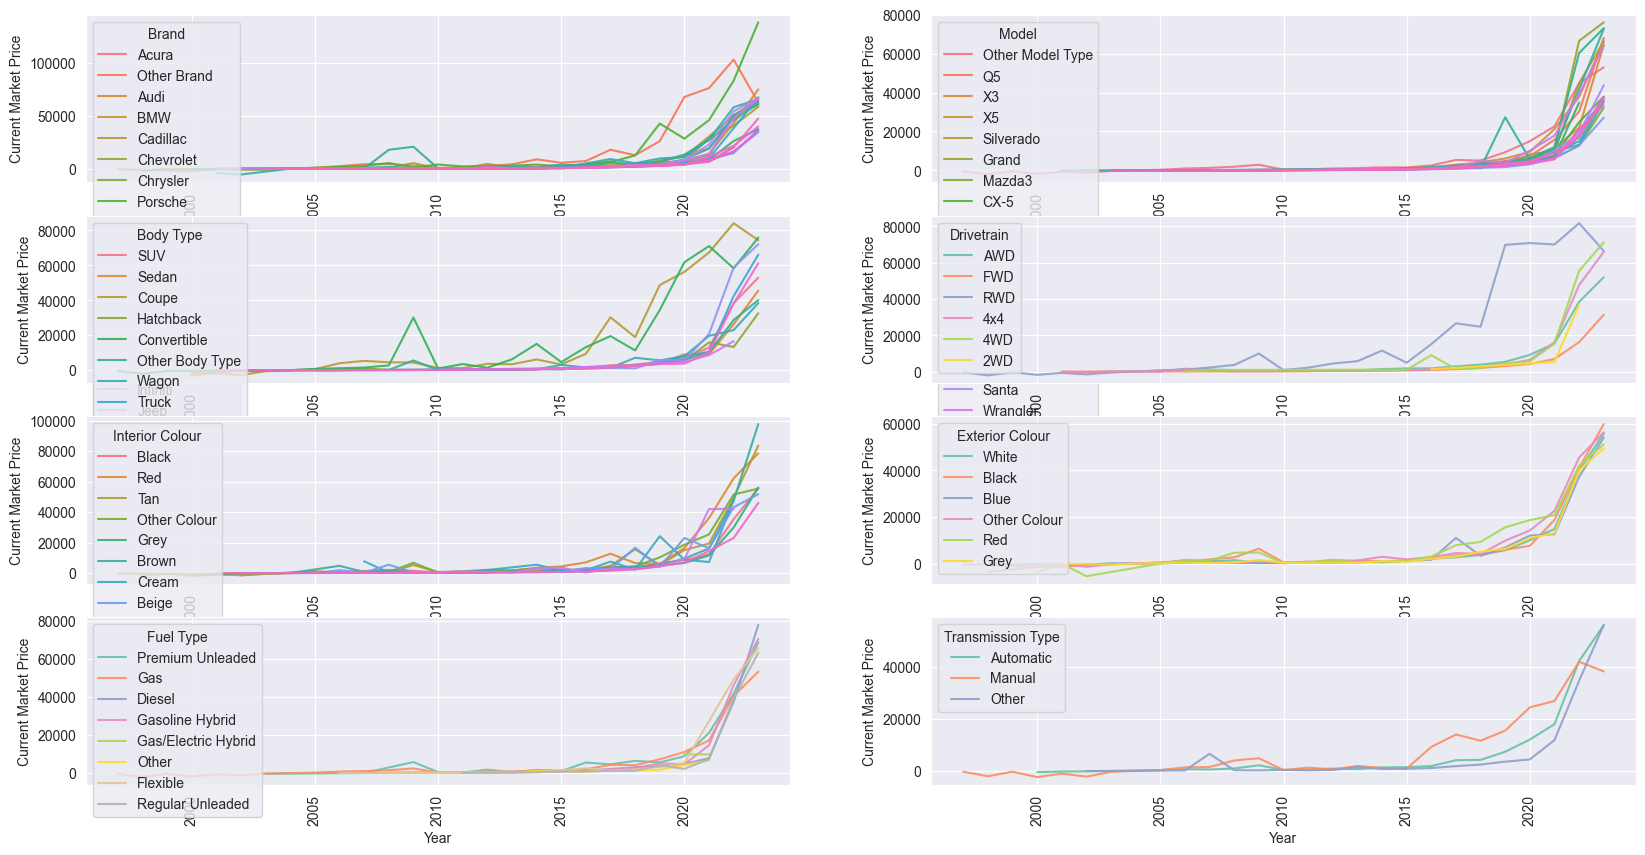

In [42]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,10))
axs = axs.ravel()

for i, var in enumerate(categorical_columns):
    sns.lineplot(x='Year', y='Current Market Price', hue=var, data=df, ax=axs[i], errorbar=None, estimator='mean', alpha=0.9)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

plt.show()

## 4. Scatter Plot:

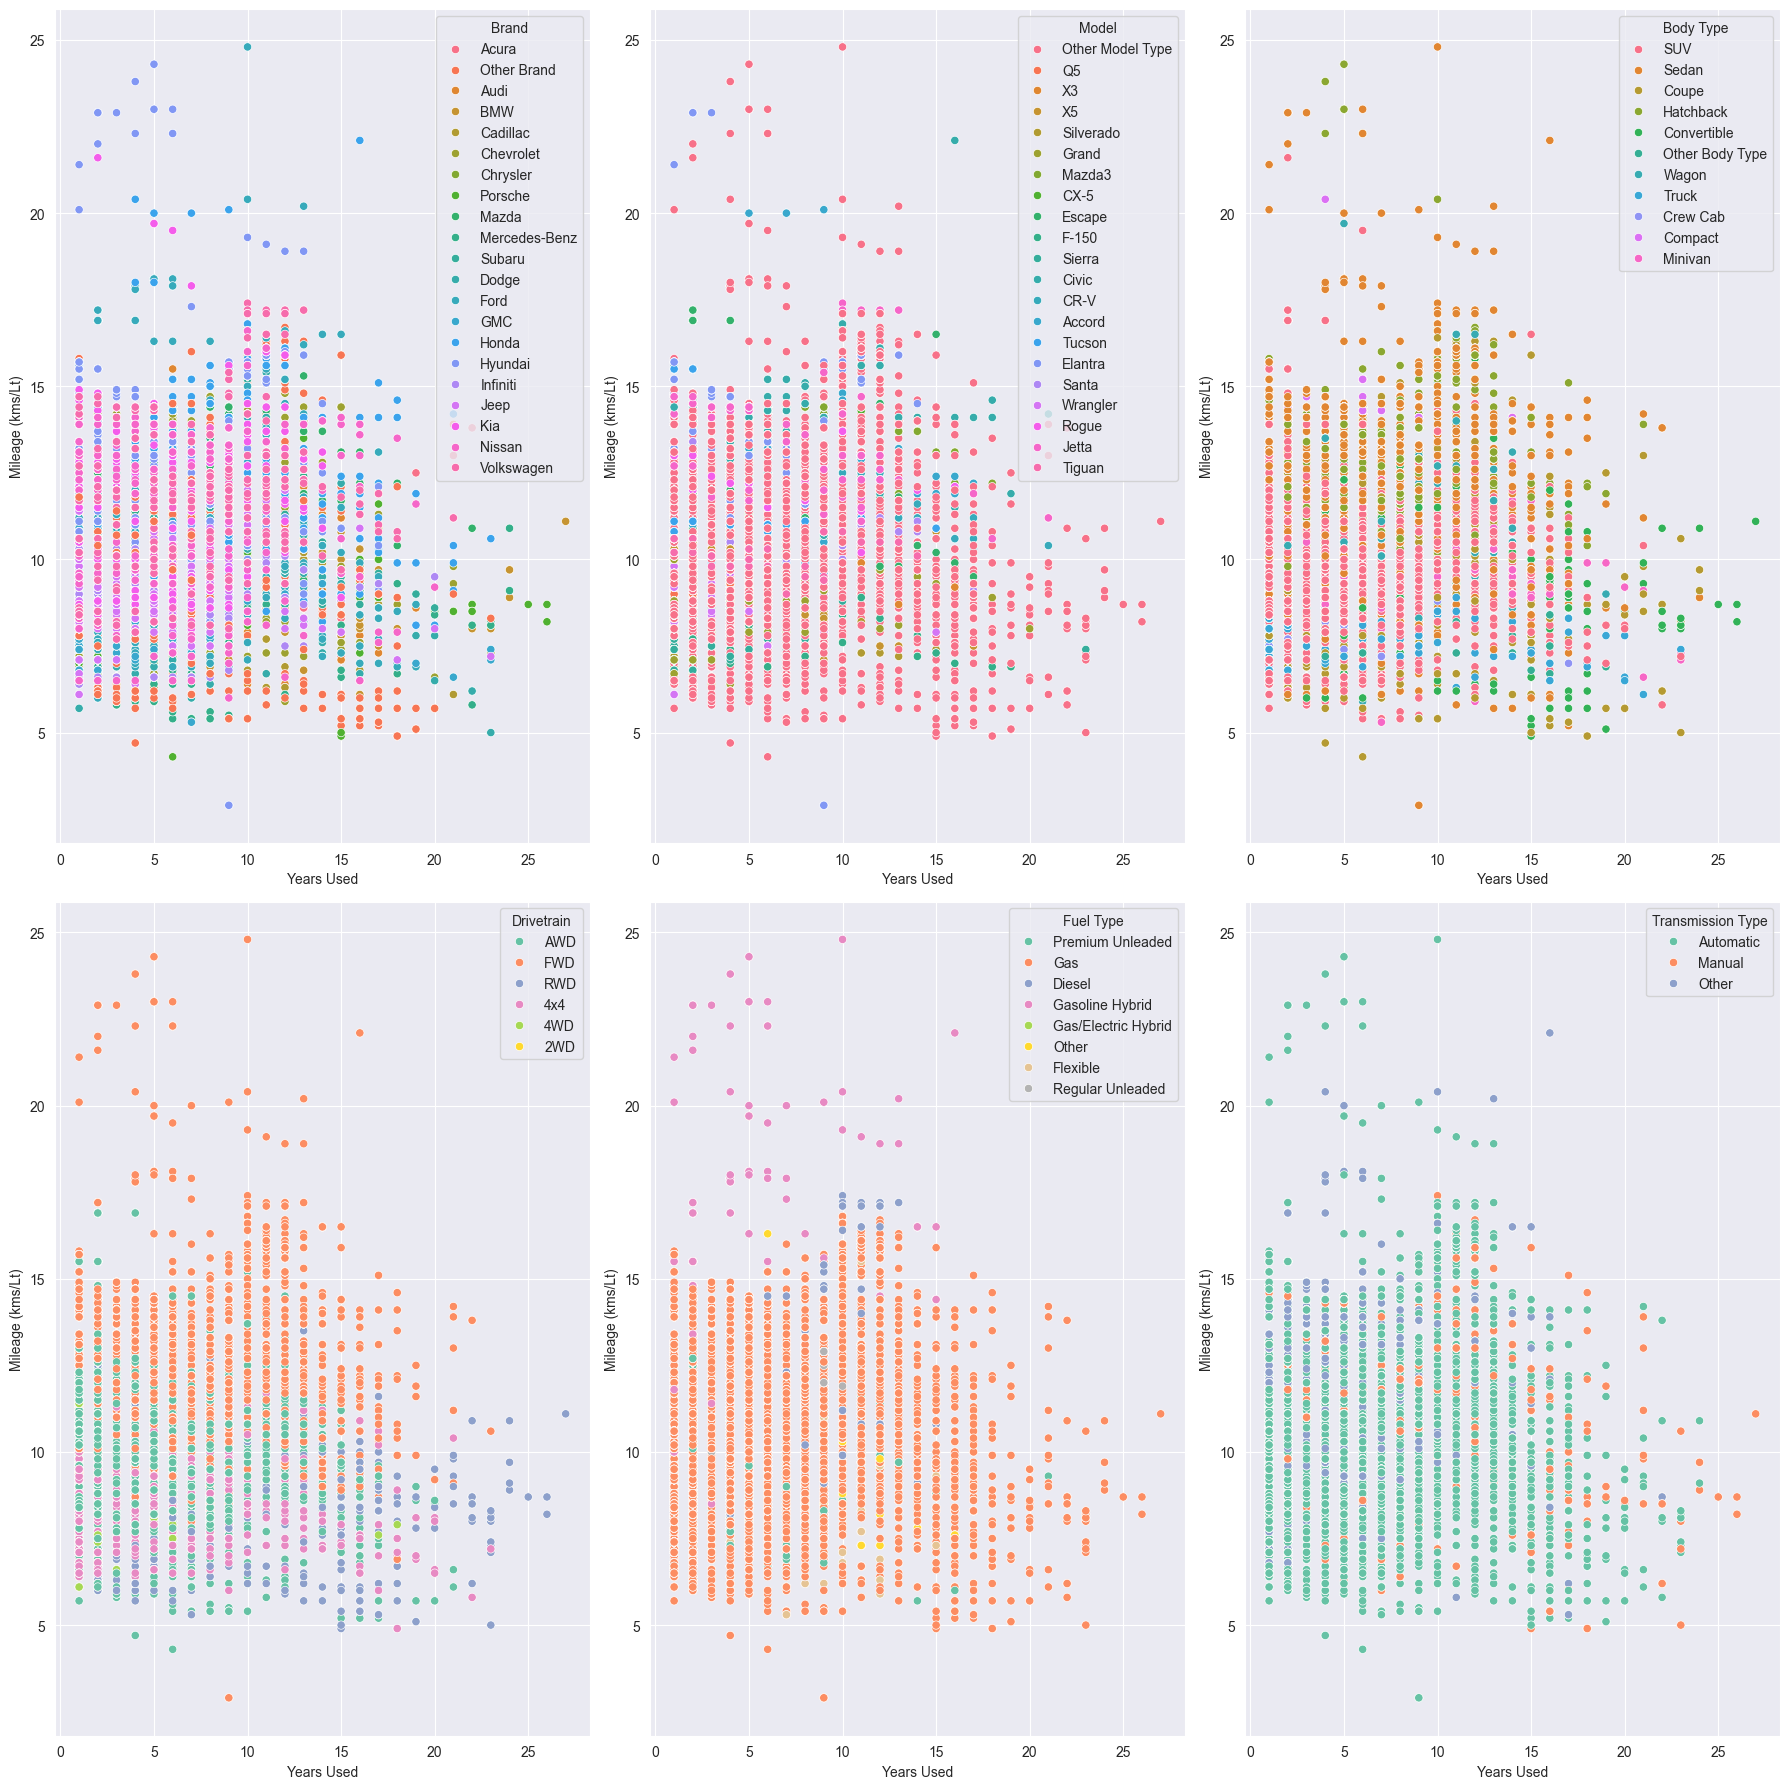

In [52]:
cols = ['Brand', 'Model', 'Body Type', 'Drivetrain', 'Fuel Type','Transmission Type']

fig, axs = plt.subplots(2, 3, figsize=(18, 18))
axs = axs.flatten()

for i, var in enumerate(cols):
    sns.scatterplot(x='Years Used', y='Mileage (kms/Lt)', hue=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

## EDA Part 2: Feature Importance & Feature Selection

In [54]:
df2 = pd.read_csv("transformed_df.csv")
df2

,Year,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Fuel Efficiency (Lt/100kms),Distance (km),Mileage (kms/Lt),Years Used,Purchase Price,Current Market Price
0,2019.0,0.0,10.0,7.0,3.0,1.0,5.0,6.0,0.0,4.0,4.0,9.92,33032.0,10.1,5.0,40888.0,7126.32
1,2022.0,0.0,10.0,7.0,3.0,7.0,0.0,2.0,0.0,4.0,6.0,11.16,31000.0,9.0,2.0,60899.0,13368.07
2,2020.0,0.0,10.0,7.0,3.0,1.0,0.0,6.0,0.0,4.0,4.0,10.31,27800.0,9.7,4.0,49099.0,10391.32
3,2019.0,0.0,10.0,8.0,3.0,8.0,0.0,6.0,0.0,4.0,6.0,9.74,34396.0,10.3,5.0,36499.0,6165.93
4,2020.0,0.0,10.0,7.0,3.0,1.0,0.0,2.0,0.0,4.0,4.0,9.92,60892.0,10.1,4.0,38495.0,4344.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11600,2011.0,17.0,10.0,10.0,4.0,6.0,5.0,2.0,0.0,4.0,5.0,8.53,206835.0,11.7,13.0,11495.0,185.54
11601,2021.0,17.0,10.0,7.0,3.0,1.0,5.0,2.0,0.0,4.0,4.0,9.35,36519.0,10.7,3.0,46980.0,8584.23
11602,2022.0,17.0,10.0,10.0,3.0,6.0,5.0,2.0,0.0,4.0,4.0,9.59,8460.0,10.4,2.0,64980.0,31680.39
11603,2023.0,17.0,10.0,7.0,3.0,3.0,5.0,4.0,0.0,4.0,4.0,8.50,50.0,11.8,1.0,82479.0,77965.22


### 1. Correlation Matrix:

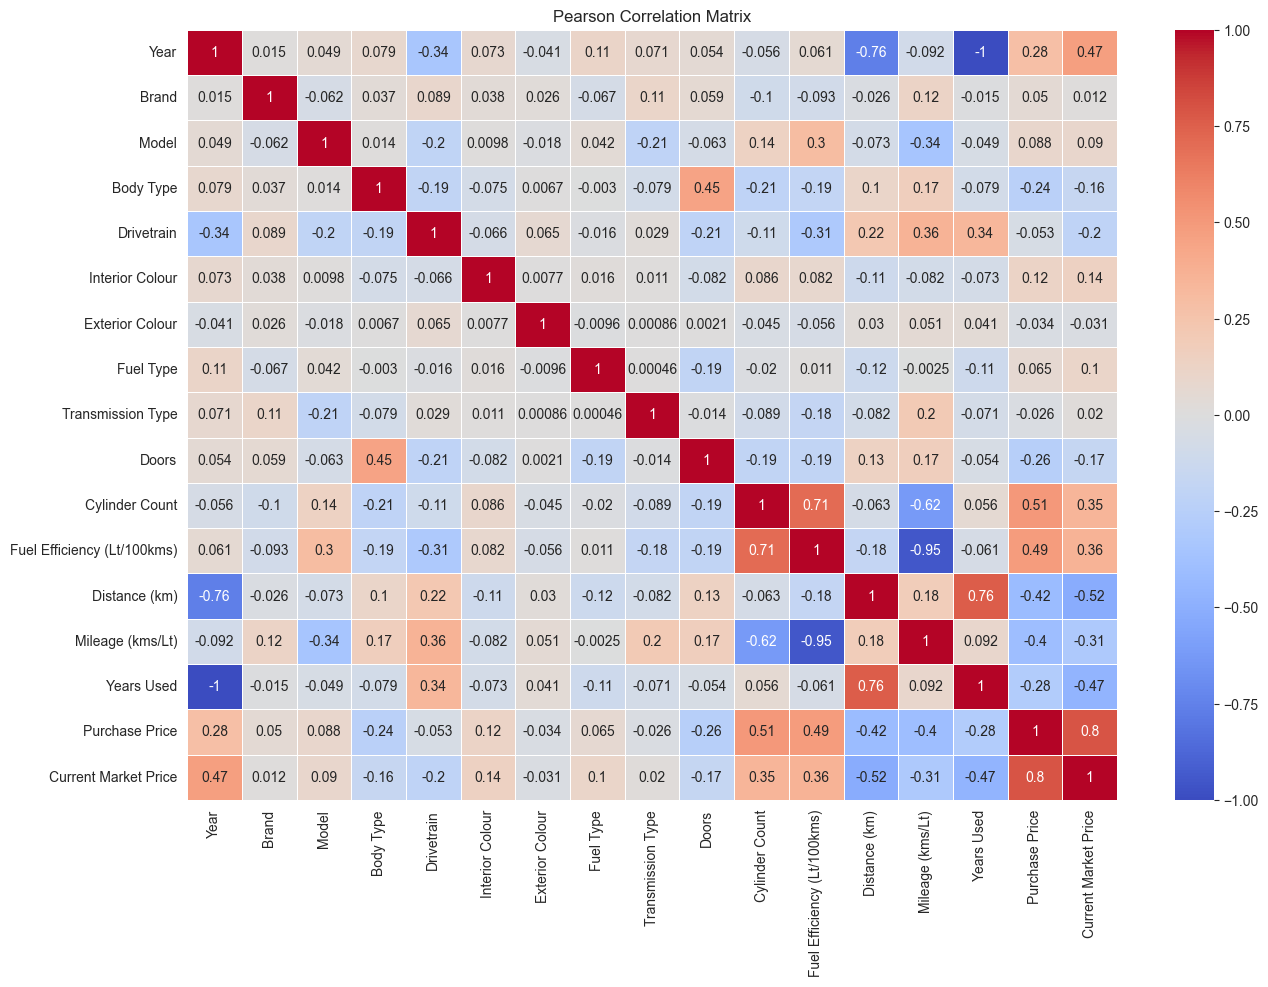

In [55]:
corr_matrix = df2[columns].corr()

#Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, fmt='.2g', annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

### 2. Feature Importance:

In [87]:
from sklearn.model_selection import train_test_split

x = df2.iloc[:,:-2]
y = df2.iloc[:,-2]
# (x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "s:\

In [89]:
dtree = DecisionTreeRegressor(max_depth= 8,max_features= 'log2', min_samples_leaf = 1, min_samples_split = 2)
dtree.fit(x, y)

DecisionTreeRegressor(max_depth=8, max_features='log2')

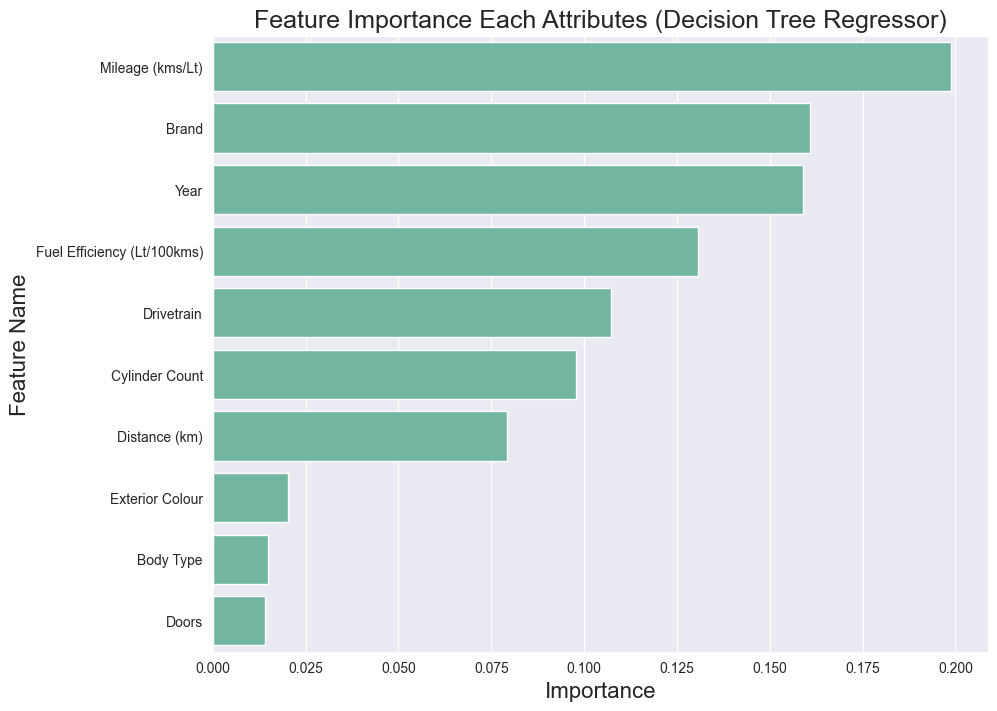

In [90]:
imp_df = pd.DataFrame({
    "Feature Name": x.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

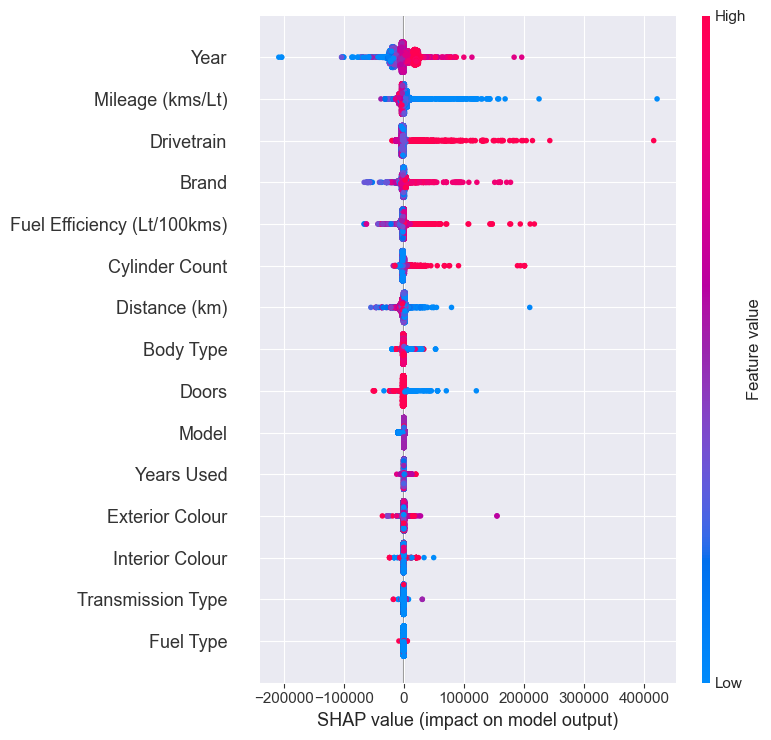

In [91]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

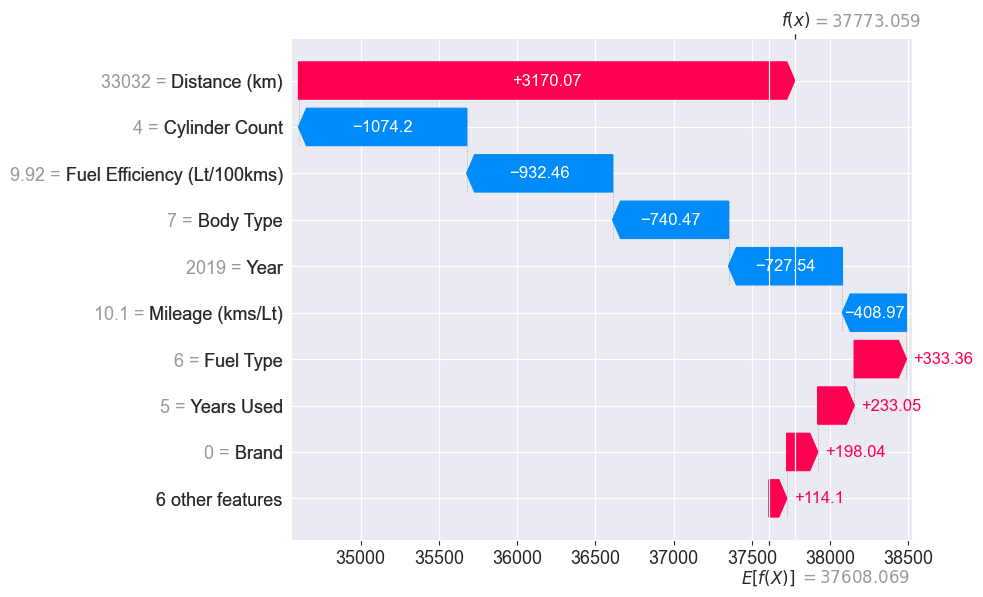

In [92]:
explainer = shap.Explainer(dtree, x)
shap_values = explainer(x)
shap.plots.waterfall(shap_values[0])